In [2]:
import json
import numpy as np
import instaloader
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\jessi\anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'cp1252', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


In [3]:
bot = instaloader.Instaloader()

profile = instaloader.Profile.from_username(bot.context, 'TouchRadiance')
print("Username: ", profile.username)
print("User ID: ", profile.userid)
print("Number of Posts: ", profile.mediacount)
print("Followers Count: ", profile.followers)
print("Following Count: ", profile.followees)
print("Bio: ", profile.biography)
print("External URL: ", profile.external_url)

Username:  touchradiance
User ID:  9458191371
Number of Posts:  173
Followers Count:  2196
Following Count:  38
Bio:  Embrace the Radiance within you 🧡
🍃 Organic, Vegan & Clean Skincare
Formulated for Sensitive Skin, Tailored to Women of Color ✨
External URL:  https://flow.page/touchradiance


# Extracting & Preparing Data

In [46]:
# Open the JSON file in read mode
with open('posts.json', 'r') as f:
    # Load the contents of the file as a Python dictionary
    data = json.load(f)["organic_insights_posts"]

In [47]:
# Initialize an empty list to store the extracted data
extracted_data = []

# Iterate through each record in the JSON data
for record in tqdm(data):
    # Extract the required values from the record
#     software = record['media_map_data']['Media Thumbnail']['media_metadata']['photo_metadata']['exif_data'][0]['software']
    title = record['media_map_data']['Media Thumbnail']['title']
    timestamp = record['string_map_data']['Creation Timestamp']['timestamp']
    profile_visits = record['string_map_data']['Profile Visits']['value']
    impressions = record['string_map_data']['Impressions']['value']
    follows = record['string_map_data']['Follows']['value']
    accounts_reached = record['string_map_data']['Accounts reached']['value']
    saves = record['string_map_data']['Saves']['value']
    likes = record['string_map_data']['Likes']['value']
    comments = record['string_map_data']['Comments']['value']
    try:
        shares = record['string_map_data']['Shares']['value']
    except:
        shares = 0
    
    # Append the extracted data to the list
    extracted_data.append([software, title, timestamp, profile_visits, impressions, follows, accounts_reached, saves, likes, comments, shares])

# Convert the extracted data into a Pandas DataFrame
df = pd.DataFrame(extracted_data, columns=['Software', 'Title', 'Timestamp', 'Profile Visits', 'Impressions', 'Follows', 'Accounts Reached', 'Saves', 'Likes', 'Comments', 'Shares'])
df.head()

100%|████████████████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<?, ?it/s]


,Software,Title,Timestamp,Profile Visits,Impressions,Follows,Accounts Reached,Saves,Likes,Comments,Shares
0,Instagram,Come meet with us at this selfcare pop-up host...,1682353328,1,99,0,93,0,6,0,0
1,Instagram,â¨ VERSION FR EN BAS â¨âââââââ...,1679672707,2,187,0,165,1,10,0,0
2,Instagram,"âMy skin typically is constantly broken out,...",1679494526,4,141,0,121,0,10,0,0
3,Instagram,"ðâ¨ Achieve a luminous, glowing complexion...",1679413882,3,261,0,231,0,13,0,0
4,Instagram,A moisturizer that literally melts in your han...,1678111236,3,195,0,171,1,13,1,0


In [48]:
# Replacing Ambigous Values
df = df.replace("--", -1)

In [49]:
# FUnction to convert values to integer
def to_int(x):
    try:
        x = int(x)
    except:
        if "," in str(x):
            x = int("".join(str(x).split(",")))
        else:
            print(x)
            return x
    return x


# Converting values to Integer
num_cols = ['Profile Visits', 'Impressions',
       'Follows', 'Accounts Reached', 'Saves', 'Likes', 'Comments', 'Shares']

for i in num_cols:
    df[i] = df[i].apply(to_int)

# Data Exploration

In [51]:
df.Software.unique()

array(['Instagram'], dtype=object)

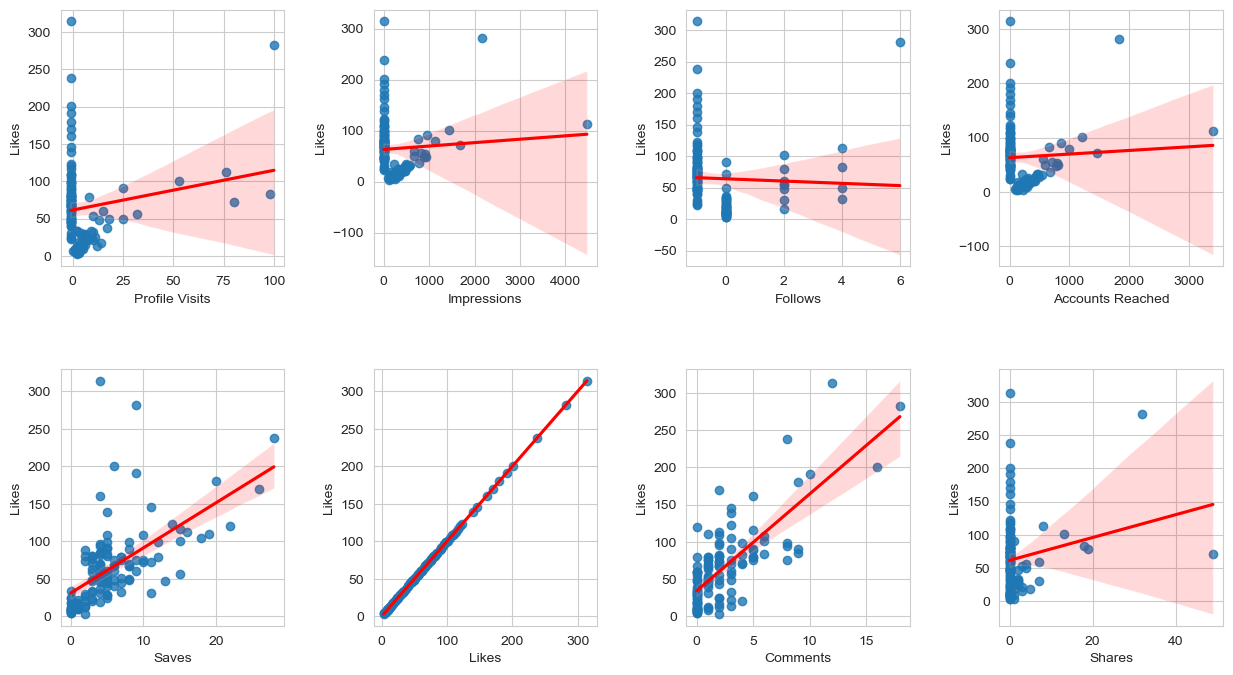

In [63]:
# Set the style of the plots
sns.set_style('whitegrid')

# Create a figure with subplots for each numerical column
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the array of subplots
axs = axs.flatten()

# Create a regression plot for each numerical column
num_cols = ['Profile Visits', 'Impressions', 'Follows', 'Accounts Reached', 'Saves', 'Likes', 'Comments', 'Shares']
for i, col in enumerate(num_cols):
    sns.regplot(x=col, y='Likes', data=df, ax=axs[i], line_kws={'color': 'red'})
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Likes')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

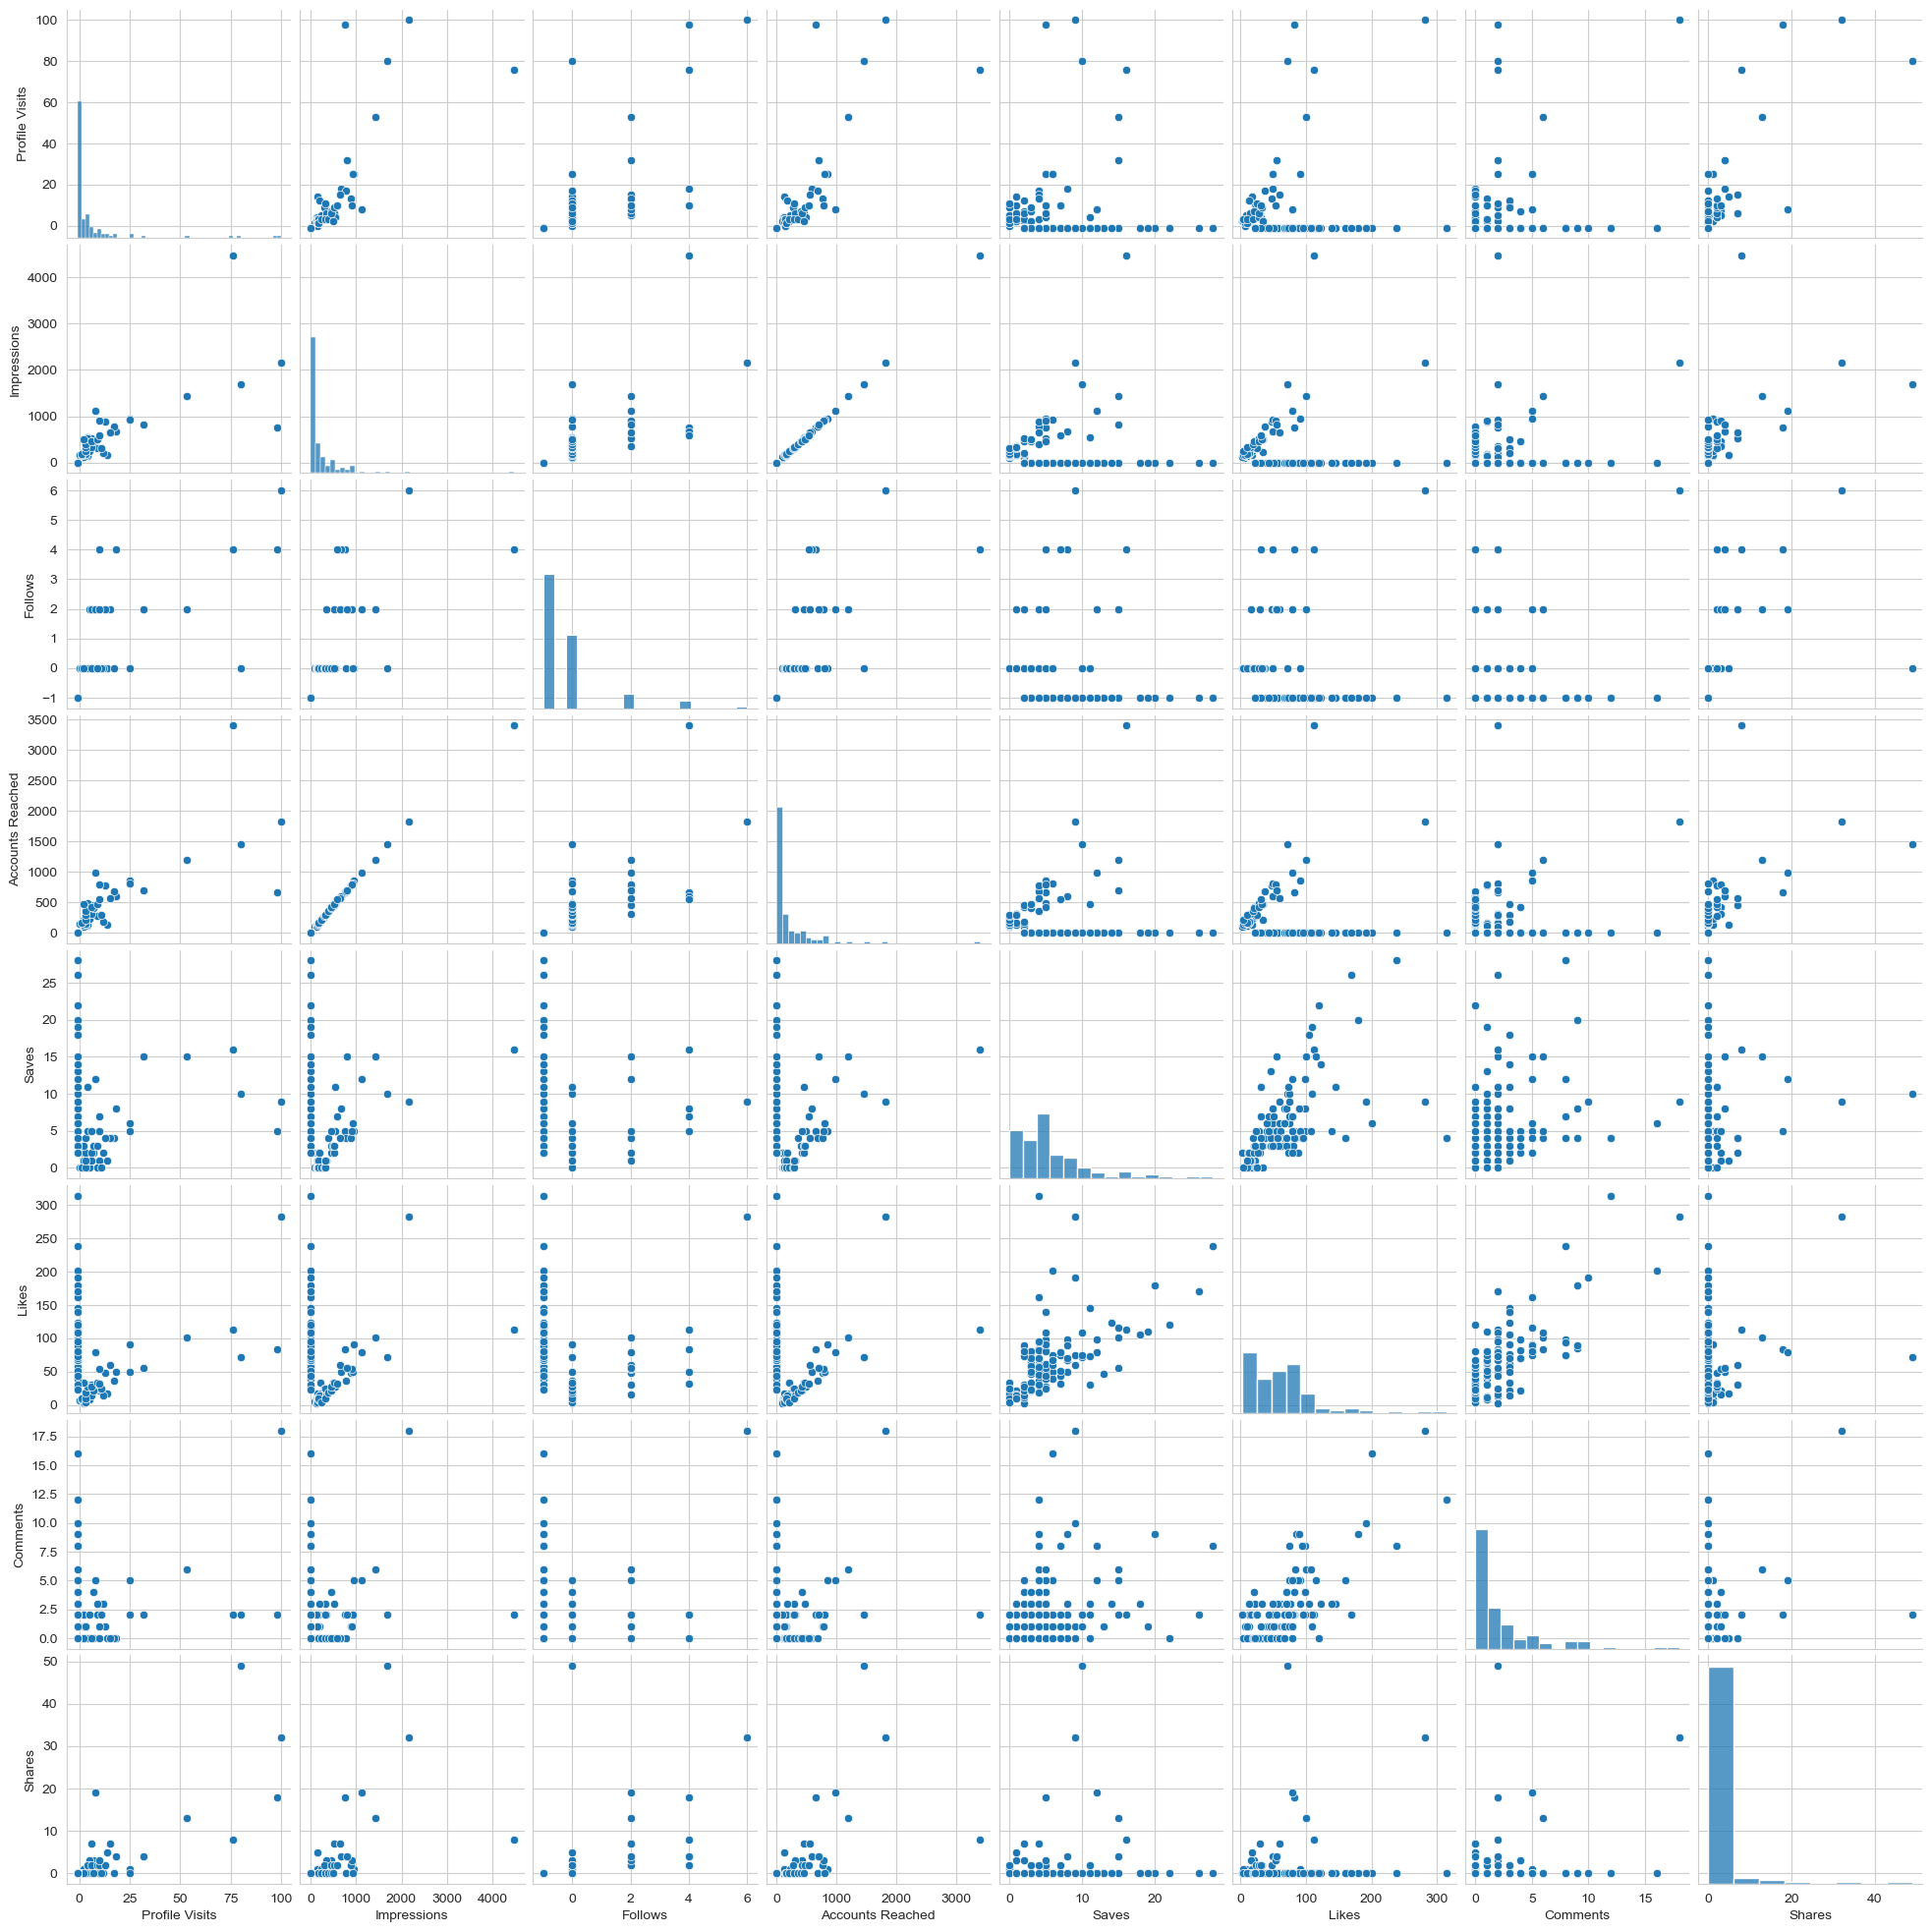

In [64]:
sns.pairplot(df[num_cols])

In [54]:
corr = df[num_cols].corr()
corr

,Profile Visits,Impressions,Follows,Accounts Reached,Saves,Likes,Comments,Shares
Profile Visits,1.000000,0.796758,0.739763,0.810362,0.128731,0.168088,0.197902,0.804033
Impressions,0.796758,1.000000,0.741679,0.997338,0.143819,0.065112,0.079953,0.591411
Follows,0.739763,0.741679,1.000000,0.764453,-0.019247,-0.042111,0.037496,0.536723
Accounts Reached,0.810362,0.997338,0.764453,1.000000,0.130808,0.052619,0.078450,0.617250
Saves,0.128731,0.143819,-0.019247,0.130808,1.000000,0.597838,0.287187,0.149797
Likes,0.168088,0.065112,-0.042111,0.052619,0.597838,1.000000,0.762841,0.187268
Comments,0.197902,0.079953,0.037496,0.078450,0.287187,0.762841,1.000000,0.216589
Shares,0.804033,0.591411,0.536723,0.617250,0.149797,0.187268,0.216589,1.000000


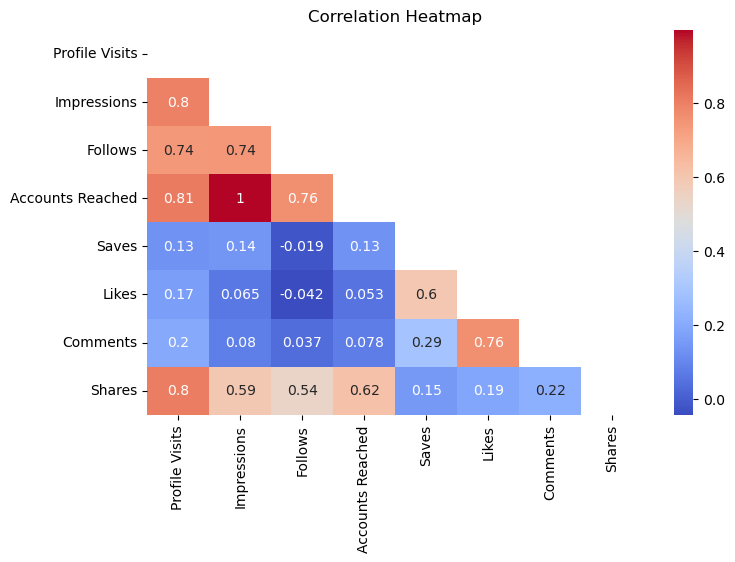

In [62]:
# Create a heatmap of the lower half of the correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()